**<h1><center>English Premier League Exploratory Data Analysis</center></h1>**

image.png

**Background**:

The English Premier League is the top level of competition in English football (Soccer). It is widely regarded as one of the most competitive and is one of the most watched sports competitions in the world. Each season typically lasts from mid-August to mid-May (with the exception of the 2019/2020 season, which was postponed for three months due to COVID-19). Each season 20 teams compete for the Premier League trophy, as well as for the top four spots. Then the top four teams will automatically be eligible for the next season of the Champions League (which is one of the most prestigious football tournaments not just in Europe but also in the world).


In the following sections, we will be performing Exploratory Data Analysis, Data Wrangling and Transformation and predictive Data Analysis for the 2020/2021 EPL Season. 


Original dataset used in this analysis can be acquired from the following link:  

https://datasetsearch.research.google.com/search?src=2&query=English%20Premier%20League&docid=L2cvMTFqY2t5XzZwNg%3D%3D

    
Dataset source credit:

https://www.football-data.co.uk/englandm.php.

https://www.premierleague.com/

        

**Key-words(Variables and Abbreviations) Definitions:**

This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more. Below is the descriptions of all the variables within the dataset.

* Position Each player has a certain position, in which he plays regularly. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper

* Starts	The number of times the player was named in the starting 11 by the manager.

* Mins	The number of minutes played by the player.

* Goals	The number of Goals scored by the player.

* Assists	The number of times the player has assisted other player in scoring the goal.

* Passes_Attempted	The number of passes attempted by the player.

* PercPassesCompleted	The number of passes that the player accurately passed to his teammate.

* xG	Expected number of goals from the player in a match.

* xA	Expected number of assists from the player in a match.

* Yellow_Cards	The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls.

* Red Cards	The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul.






**<h3>Data Cleaning and Wrangling</h3>**


    All steps of data cleaning and wrangling are done entirely in Python. Importing the required packages and libraries:

In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import squarify 

%matplotlib inline

**Importing dataset**

In [92]:
pd.set_option("display.max_columns", None) #Display all cols in the dataset
EPL_dataset = pd.read_csv("EPL_20_21.csv")



In [93]:
#Check the first 10 raws and all cols

EPL_dataset.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


In [45]:
#Checking the dataset shape

EPL_dataset.shape

(532, 18)

It appears we have 532 different data points and 18 variables. Since some of the variables are not relevant to our data analysis, so, we will only be focusing on those that matter to us. 

In [46]:
#Check if there's any missing data
EPL_dataset.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [47]:
EPL_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [48]:
#It appears we don't have any missing data. Let's check the statistical description.

EPL_dataset.describe()



,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


**Check for correlation Matrix**

<AxesSubplot:>

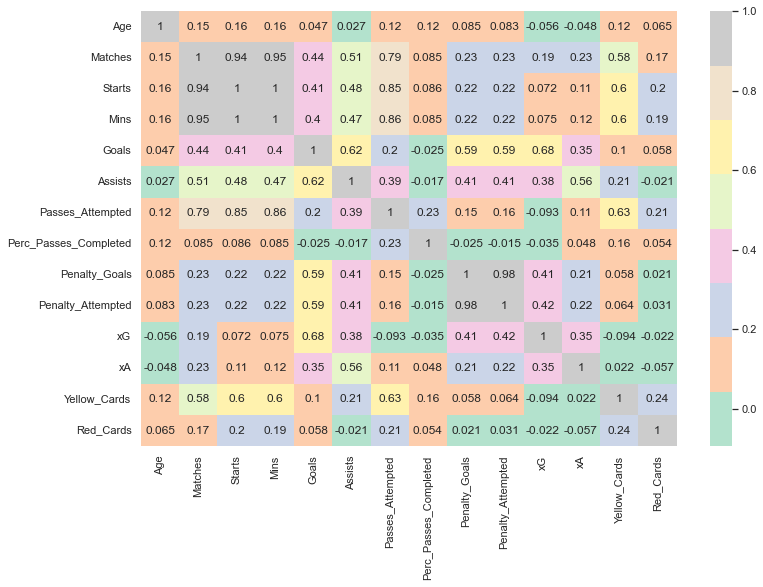

In [100]:
plt.figure(figsize= (12, 8))
sns.heatmap(EPL_dataset.corr(), annot= True, cmap = "Pastel2")

Lets' add 2 additional columns(Minutes played per match, and goals per match into our dataset) for further analysis.

In [49]:
EPL_dataset["MinutesPerMatch"] = (EPL_dataset['Mins']/ EPL_dataset["Matches"]).astype(int)

EPL_dataset["GoalsPerMatch"] = (EPL_dataset['Goals'] / EPL_dataset['Matches']).astype(float)


EPL_dataset.head() #Verify the newly created columns. 


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


**What are the overall gaols scored during the the season? and how many of the goals were penalty?** 

In [50]:

Total_Goals = EPL_dataset["Goals"].sum()

Total_PenaltyGoals = EPL_dataset["Penalty_Goals"].sum()

print("Total_Goals:", Total_Goals, "\n")
print("Total Penalty Goals:", Total_PenaltyGoals)


Total_Goals: 986 

Total Penalty Goals: 102


**Calculate how many penalties were given during the entire season?**

In [51]:
Total_PenaltyAttemped = EPL_dataset["Penalty_Attempted"].sum()

print("Total Penalties Attemped:", Total_PenaltyAttemped)

Total Penalties Attemped: 125


**Calculate the Penalty conversion rate for the season.**

In [52]:
Penalty_ConversionRate = (Total_PenaltyGoals/Total_PenaltyAttemped) * 100

print("Penalty Conversion Rate:", round(Penalty_ConversionRate),"%")

print("Penalty Missed Rate:", round(100 - Penalty_ConversionRate),"%" )


Penalty Conversion Rate: 82 %
Penalty Missed Rate: 18 %


**Visualize Penalty Conversion rate in a Pie chart**

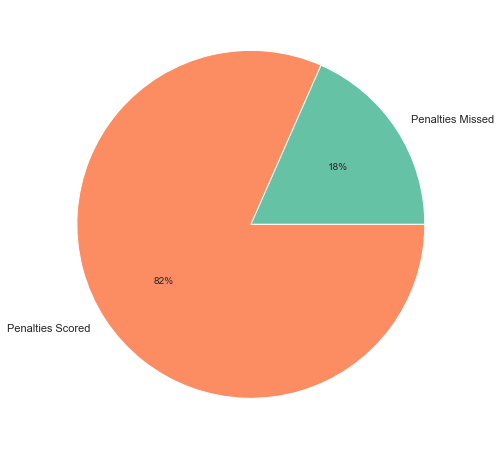

In [53]:
#Penalties Scored vs Missed

plt.figure(figsize = (13, 8))

Penalty_Missed = EPL_dataset["Penalty_Attempted"].sum() - Total_PenaltyGoals

Penalty_data = [Penalty_Missed, Total_PenaltyGoals]

#Let's create a labels 

labels = ["Penalties Missed", "Penalties Scored"]

color = sns.color_palette("Set2")

plt.pie(Penalty_data, labels= labels, colors = color, autopct= "%.0f%%")

plt.show()

**What are the unique/distinct positions available in the dataset?**

In [54]:
EPL_dataset["Position"].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

It appears some players played in more than one positions throughout the season.

**How many unique Nationalities are represented in EPL last season?**

In [55]:
Nations_represented = len(EPL_dataset["Nationality"].unique())

print(f"There were: {Nations_represented} different nationality's players playing throughout the season")

There were: 59 different nationality's players playing throughout the season


In [56]:
#We can also use the following method to achieve the same result.
np.size(EPL_dataset["Nationality"].unique())

59

**Determine countries with the most players in English Premier League and display it in bar chart**

In [57]:
#Let's use groupby to group players from the same country. 

Nationality = EPL_dataset.groupby("Nationality").size().sort_values(ascending= False)

Nationality.head(10) #Top 10 countries with most players in English Premier League

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
dtype: int64

<AxesSubplot:xlabel='Nationality'>

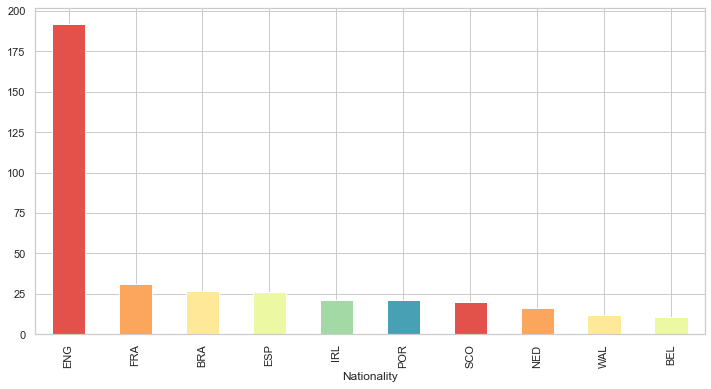

In [116]:
#Let's plot the above result.

Nationality_fig = Nationality.head(10)

Nationality_fig.plot(kind = "bar", figsize = (12, 6), color = sns.color_palette("Spectral"))


<AxesSubplot:>

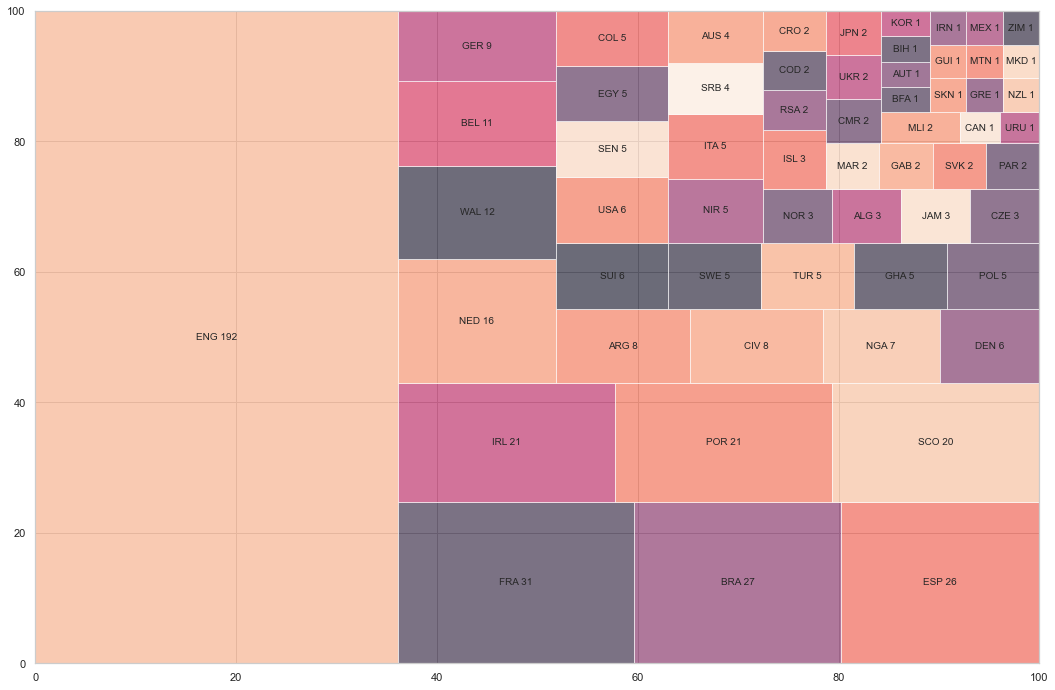

In [140]:
#Players distributions by nationality:


fig = plt.figure(figsize=(18,12))

sizes=EPL_dataset.groupby('Nationality',)['Name'].count().sort_values(ascending= False).tolist() 
label=EPL_dataset.groupby('Nationality',)['Name'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )


 * Most players are from England(192), followed by France(31), Brazil(27) and then Spain (26).

**What does the age distribution in the league looks like?**

<Figure size 864x576 with 0 Axes>

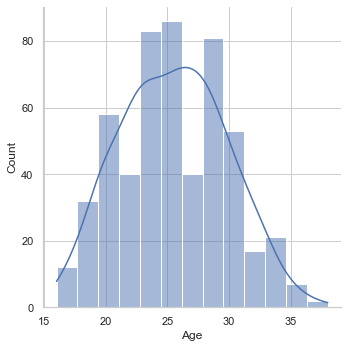

In [123]:

plt.figure(figsize=(12, 8))

sns.displot(data=EPL_dataset, x = "Age", kde = True)

In [113]:
#Oldest player in the league

Oldest_player = EPL_dataset[EPL_dataset['Age'] == EPL_dataset["Age"].max()]

Oldest_player



,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0


In [115]:
#Youngest players in the league

Youngest_players = EPL_dataset[EPL_dataset['Age'] == EPL_dataset["Age"].min()]

Youngest_players

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.0,0,0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,8,62.5,0,0,0.29,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0


The above result shows oldest and the youngest players in the league during 2020-2021 season.

**Clubs with maximum players in their squad**

<AxesSubplot:>

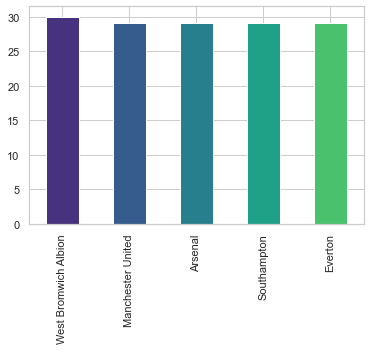

In [60]:
EPL_dataset["Club"].value_counts().nlargest(5).plot(kind = "bar", color = sns.color_palette("viridis"))

**Clubs with least players in their squad**

<AxesSubplot:>

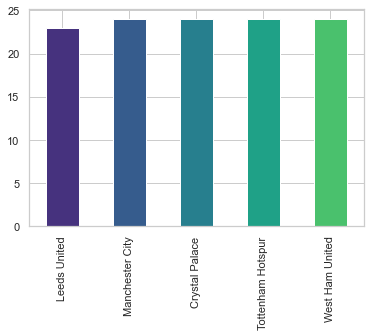

In [61]:
EPL_dataset["Club"].value_counts().nsmallest(5).plot(kind = "bar", color = sns.color_palette("viridis"))

**Use a Treemapping method to display each team with the numbers of players they have for better understanding**

<AxesSubplot:>

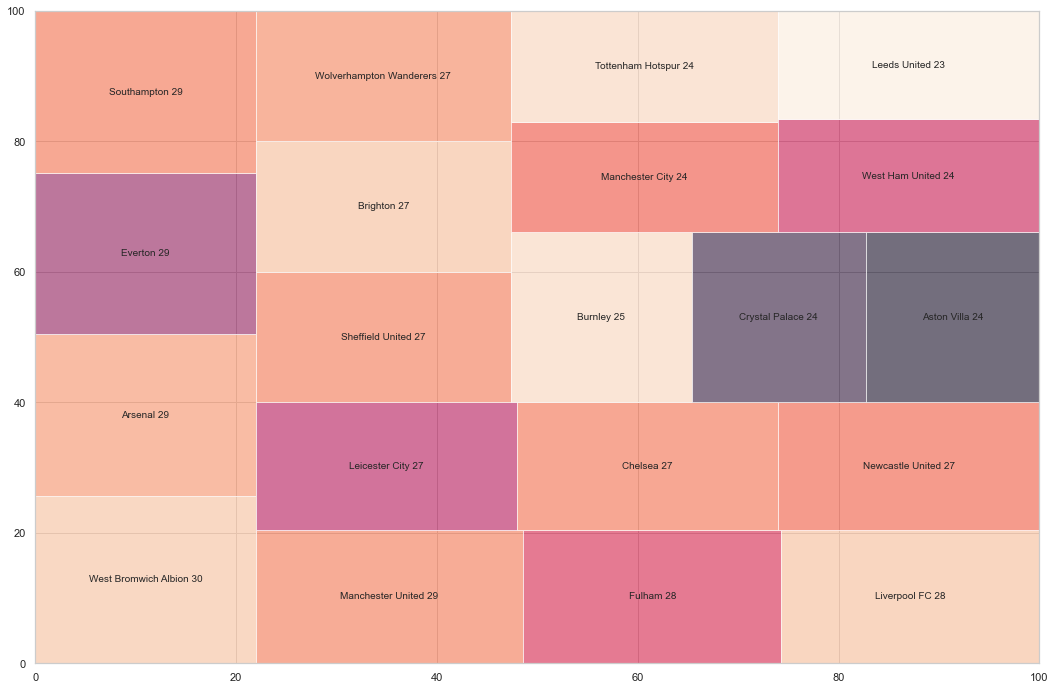

In [150]:


fig = plt.figure(figsize=(18,12))
sizes=EPL_dataset.groupby('Club',)['Name'].count().sort_values(ascending= False).tolist() 
label=EPL_dataset.groupby('Club',)['Name'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

* West Bromwich Albion has largest squad with 30 players in it, followed by Arsenal and Manchester United with 29 each. Leeds United has the smallest squad with 23 players.

**Categorizing Players based on age group**

In [62]:
Under20 = EPL_dataset[EPL_dataset["Age" ] <=20]
Age20_25 = EPL_dataset[(EPL_dataset["Age"] > 20) & (EPL_dataset["Age"] <=25)]
Age25_30 = EPL_dataset[(EPL_dataset["Age"] > 25) & (EPL_dataset['Age'] <=30)]
Above30 = EPL_dataset[EPL_dataset['Age'] >30 ]

**Visualize the above result in a pie chart to get a better age distribution within our dataset.**

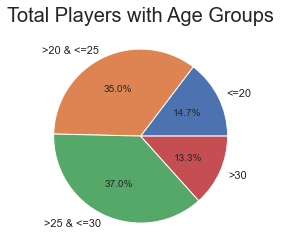

In [63]:
x = np.array([Under20["Name"].count(), Age20_25["Name"].count(), Age25_30["Name"].count(), Above30["Name"].count()])

mylabels = ["<=20", ">20 & <=25", ">25 & <=30", ">30"]

plt.title("Total Players with Age Groups", fontsize = 20)

plt.pie(x, labels = mylabels, autopct="%.1f%%")

plt.show()


**What are the total player younger than 20 in each club?**

<AxesSubplot:title={'center':'Players Under 20 In Each Team'}, xlabel='Club', ylabel='Players Under 20'>

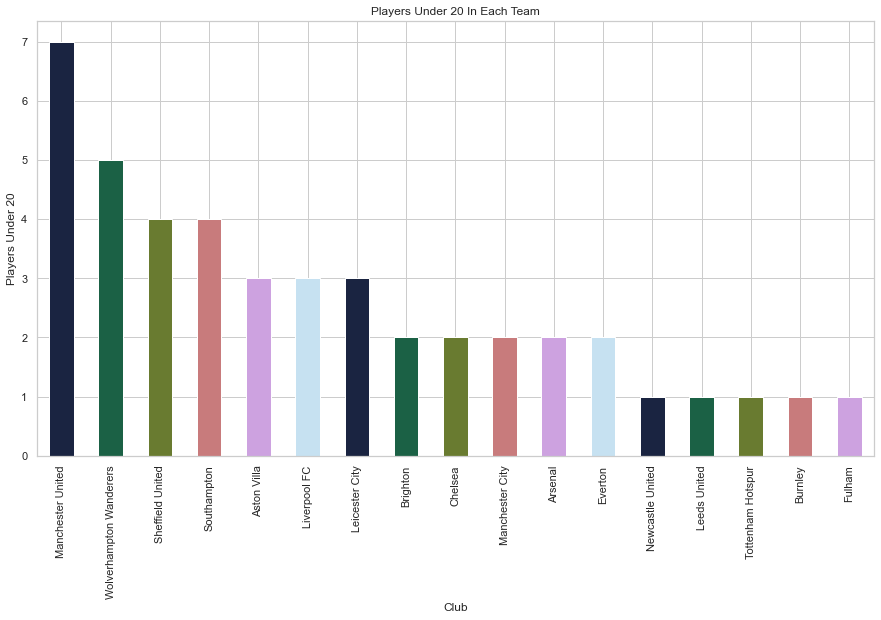

In [64]:



Players_under20 =  EPL_dataset[EPL_dataset["Age"] <20 ]

#Let's plot this in a bar chart and check the result.

plt.title("Players Under 20 In Each Team")
plt.xlabel("Club")

plt.ylabel("Players Under 20")

Players_under20["Club"].value_counts().plot(kind = "bar", color = sns.color_palette("cubehelix"), figsize = (15,8))


**Identify players who are under 20 in Manchester United, Manchester City and Chelsea Club.**

**Manchester United Players Under 20**

In [65]:
MNU_Under20 = Players_under20[Players_under20["Club"] == "Manchester United"]
MNU_Under20

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


**Manchester City Players Under 20**

In [66]:
MC_Under20 = Players_under20[Players_under20["Club"] == "Manchester City"]

MC_Under20

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
47,Eric García,Manchester City,ESP,DF,19,6,3,383,0,0,344,93.6,0,0,0.03,0.02,0,0,63,0.0
50,Liam Delap,Manchester City,ENG,FW,17,1,0,40,0,0,7,71.4,0,0,0.06,0.00,0,0,40,0.0


**Chelsea Players Under 20**

In [67]:
Chelsea_Under20 = Players_under20[Players_under20["Club"] == "Chelsea"]
Chelsea_Under20

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinutesPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


**Determine the average age of player in each club.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

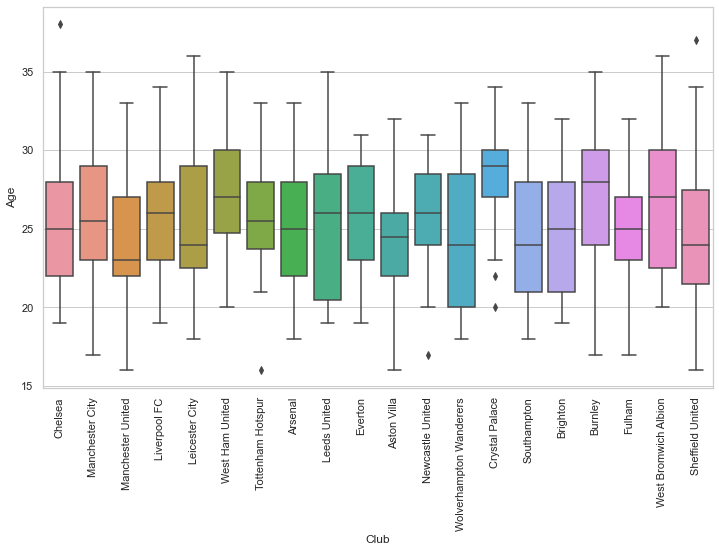

In [68]:
#Best way to achieve this is by using the boxplot to get a distribution

plt.figure(figsize =(12, 7))

sns.boxplot(x = "Club", y = "Age", data = EPL_dataset)

plt.xticks(rotation = 90)


* ***Crystal Palace and West Ham United has one of the eldest players percentile and Tottenham Hotspur has the youngest player in their squad as well as their eldest player is around 26-27 years old. Machester United's average player age is also the lowest amongst all the clubs in Premier League.***

In [69]:
#The average players age in each club during the 2020-2021 season.

num_player = EPL_dataset.groupby('Club').size()

data = (EPL_dataset.groupby("Club")["Age"].sum())/num_player

data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

**What are number of goal assistance provided in each team? and plot it.**

<AxesSubplot:>

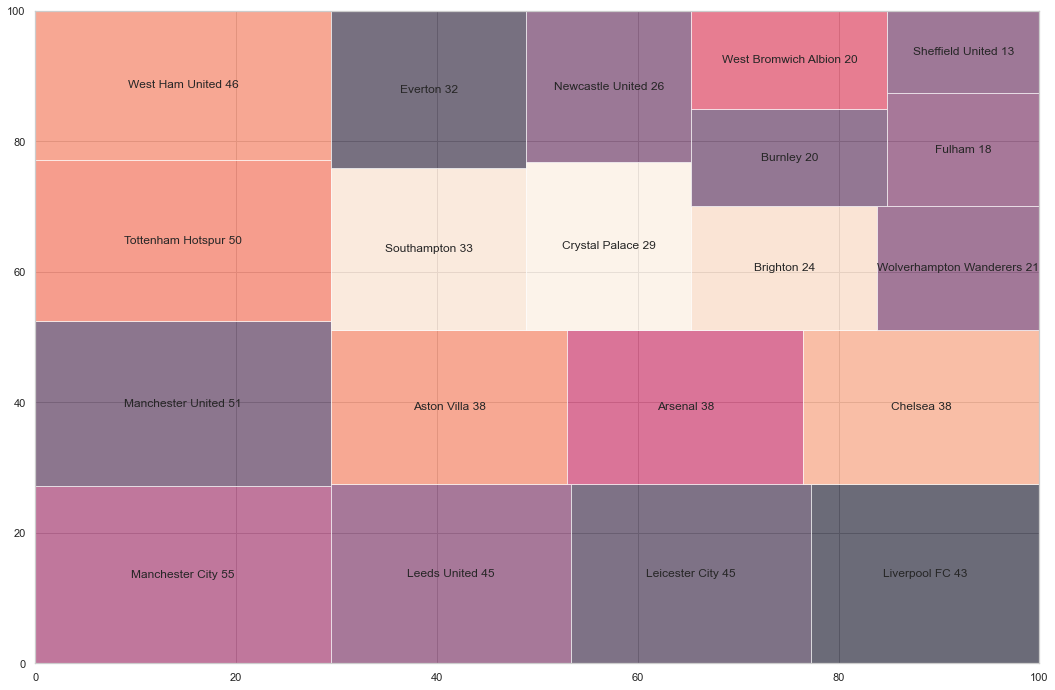

In [170]:
fig = plt.figure(figsize=(18,12))

sizes=EPL_dataset.groupby('Club',)['Assists'].sum().sort_values(ascending= False).tolist() 
label=EPL_dataset.groupby('Club',)['Assists'].sum().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

**Determine top 10 Assistant in the season**

In [175]:
from itertools import count


Top_10_Assist = EPL_dataset[["Name", "Club", "Assists", "Matches"]].nlargest(n = 10, columns= "Assists")

Top_10_Assist

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


**Determine Total Goals From Each Club**

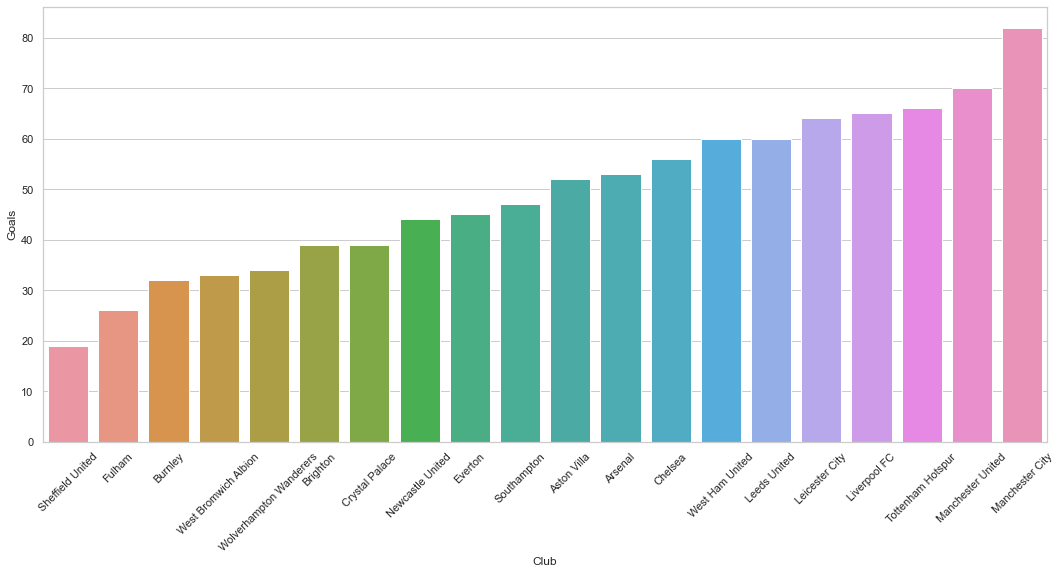

In [211]:
goal_team = pd.DataFrame(EPL_dataset.groupby('Club', as_index=False)['Goals'].sum() )
plt.figure(figsize = (18,8))

ax =sns.barplot(x='Club', y='Goals', data=goal_team.sort_values(by="Goals"))
plt.xticks(rotation=45)

plt.show()

<AxesSubplot:>

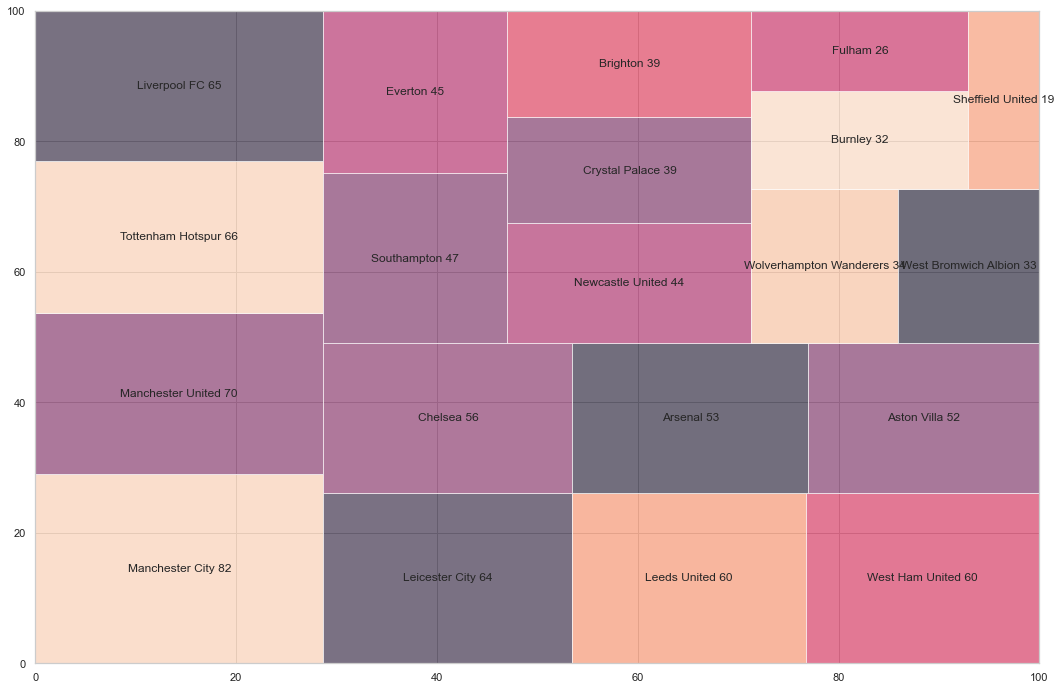

In [176]:
#Display the above result in Tree-mapping for better visualizations

fig = plt.figure(figsize=(18,12))
sizes=goal_team.groupby('Club',)['Goals'].sum().sort_values(ascending= False).tolist() 
label=goal_team.groupby('Club',)['Goals'].sum().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.6 )

In [180]:
goal_team.sort_values(by = "Goals", ascending= False)

,Club,Goals
11,Manchester City,82
12,Manchester United,70
16,Tottenham Hotspur,66
10,Liverpool FC,65
9,Leicester City,64
8,Leeds United,60
18,West Ham United,60
4,Chelsea,56
0,Arsenal,53
1,Aston Villa,52


* **Manchester City scored the most goals in the league with 82 goals and Sheffield United scored the least goals scoring, just under 20.**

**Who were the top 10 players with the highest goals last season?**

In [186]:
Top_10_Goal_Scorer = EPL_dataset[["Name","Nationality", "Age", "Club", "Goals", "Matches"]].nlargest(n = 10, columns="Goals")

Top_10_Goal_Scorer


,Name,Nationality,Age,Club,Goals,Matches
162,Harry Kane,ENG,27,Tottenham Hotspur,23,35
81,Mohamed Salah,EGY,28,Liverpool FC,22,37
51,Bruno Fernandes,POR,25,Manchester United,18,37
161,Son Heung-min,KOR,28,Tottenham Hotspur,17,37
214,Patrick Bamford,ENG,26,Leeds United,17,38
237,Dominic Calvert-Lewin,ENG,23,Everton,16,33
110,Jamie Vardy,ENG,33,Leicester City,15,34
267,Ollie Watkins,ENG,24,Aston Villa,14,37
33,İlkay Gündoğan,GER,29,Manchester City,13,28
191,Alexandre Lacazette,FRA,29,Arsenal,13,31


In [188]:
#Top Goal scorers, same result with more information included.

top_scorers= EPL_dataset.sort_values(by="Goals", ascending=False)[:10]
top_scorers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.60,0.22,1,0
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,83.2,6,6,0.61,0.18,0,0
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,74.6,9,10,0.45,0.32,6,0
214,Patrick Bamford,Leeds United,ENG,FW,26,38,37,3050,17,7,506,76.3,2,2,0.51,0.12,3,0
161,Son Heung-min,Tottenham Hotspur,KOR,FW,28,37,36,3114,17,10,1199,76.7,1,1,0.30,0.26,0,0
237,Dominic Calvert-Lewin,Everton,ENG,FW,23,33,32,2871,16,0,669,71.6,0,0,0.48,0.06,3,0
110,Jamie Vardy,Leicester City,ENG,FW,33,34,31,2840,15,9,452,66.4,8,9,0.62,0.16,1,0
267,Ollie Watkins,Aston Villa,ENG,FW,24,37,37,3328,14,5,832,72.8,1,2,0.43,0.11,4,1
33,İlkay Gündoğan,Manchester City,GER,MF,29,28,23,2029,13,2,1707,91.0,1,2,0.40,0.20,1,0
191,Alexandre Lacazette,Arsenal,FRA,FW,29,31,22,1923,13,2,524,78.2,3,3,0.46,0.13,3,0


**Display the result in a barplot.**

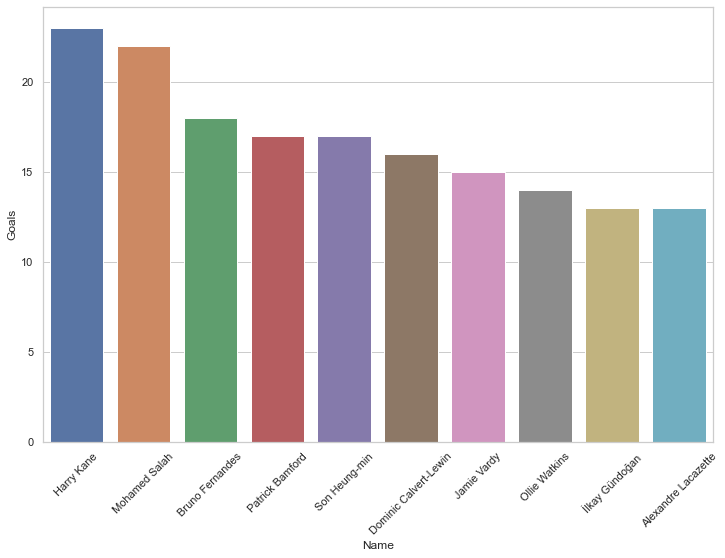

In [199]:
fig = plt.figure(figsize=(12,8))
ax =sns.barplot(x='Name', y='Goals', data=top_scorers)
plt.xticks(rotation=45)

plt.show()

* ***Harry kane is the top scorer of the league with 23 Goals followed by Mohammed Salah with 22 Goals.***

**Determine  most goals per match percentage.**

In [80]:
Top_10_Goals_per_match = EPL_dataset[["Name", "GoalsPerMatch", "Matches", "Goals"]].nlargest(n = 10, columns="GoalsPerMatch")
Top_10_Goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


**Who are the top goal assist provider in the league?**

In [191]:
top_assists= EPL_dataset[['Name', 'Club', 'Assists']].sort_values(by="Assists", ascending=False)[:5]
top_assists

,Name,Club,Assists
162,Harry Kane,Tottenham Hotspur,14
34,Kevin De Bruyne,Manchester City,12
51,Bruno Fernandes,Manchester United,12
273,Jack Grealish,Aston Villa,10
161,Son Heung-min,Tottenham Hotspur,10


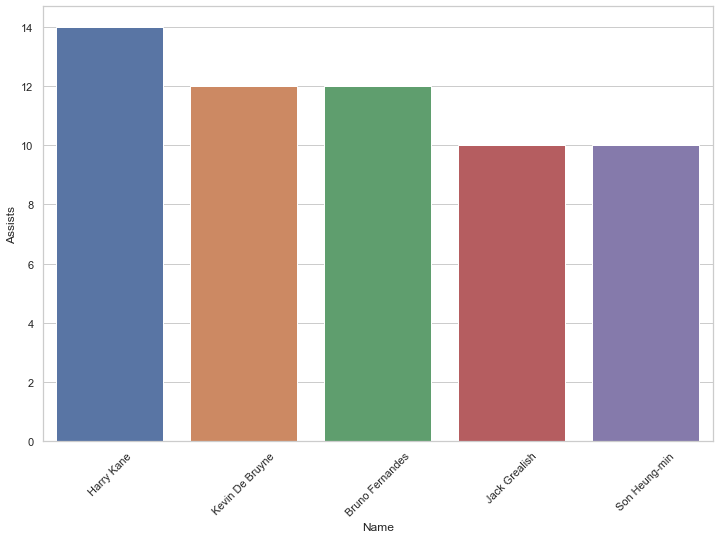

In [198]:
fig = plt.figure(figsize=(12,8))

ax =sns.barplot(x='Name', y='Assists', data=top_assists)
plt.xticks(rotation=45)

plt.show()

* ***Again Harry Kane provided the most assists(14), followed by Kevin De Bruyne(12).***

**Determine player with the most goal involvement and efficiency.**

In [226]:
Attack_df=EPL_dataset[['Name','Club', 'Mins', 'Goals', 'Assists', 'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA']]

Attack_df['Goal_involvement'] = Attack_df['Goals']+Attack_df['Assists']
Attack_df['min_per_goal_inv'] = Attack_df['Mins']/Attack_df['Goal_involvement']
Attack_df['expected_goal_inv'] = (Attack_df['xG']+EPL_dataset['xA'])*(Attack_df['Mins']/90)
Attack_df['min_per_exp_goal_inv']= EPL_dataset['Mins']/Attack_df['expected_goal_inv']
Attack_df.replace([np.inf, -np.inf], np.nan, inplace=True)




Name = Attack_df[['Name','Club', 'Goals', 'Assists', 'Goal_involvement', 'expected_goal_inv' ]].sort_values(by="Goal_involvement", ascending = False)[:10]
Name.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_4936\2585266552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attack_df['Goal_involvement'] = Attack_df['Goals']+Attack_df['Assists']
C:\Users\Admin\AppData\Local\Temp\ipykernel_4936\2585266552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attack_df['min_per_goal_inv'] = Attack_df['Mins']/Attack_df['Goal_involvement']
C:\Users\Admin\AppData\Local\Temp\ipykernel_4936\2585266552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Name,Club,Goals,Assists,Goal_involvement,expected_goal_inv
162,Harry Kane,Tottenham Hotspur,23,14,37,28.080444
51,Bruno Fernandes,Manchester United,18,12,30,26.513667
81,Mohamed Salah,Liverpool FC,22,5,27,27.018000
161,Son Heung-min,Tottenham Hotspur,17,10,27,19.376000
110,Jamie Vardy,Leicester City,15,9,24,24.613333


In [227]:
Attack_df[['Name', 'xG', 'xA', 'Goal_involvement', 'expected_goal_inv']].sort_values(by="expected_goal_inv", ascending = False)[:10].head()

,Name,xG,xA,Goal_involvement,expected_goal_inv
162,Harry Kane,0.60,0.22,37,28.080444
81,Mohamed Salah,0.61,0.18,27,27.018000
51,Bruno Fernandes,0.45,0.32,30,26.513667
110,Jamie Vardy,0.62,0.16,24,24.613333
214,Patrick Bamford,0.51,0.12,24,21.350000


**Plot the above result and better visualization.**

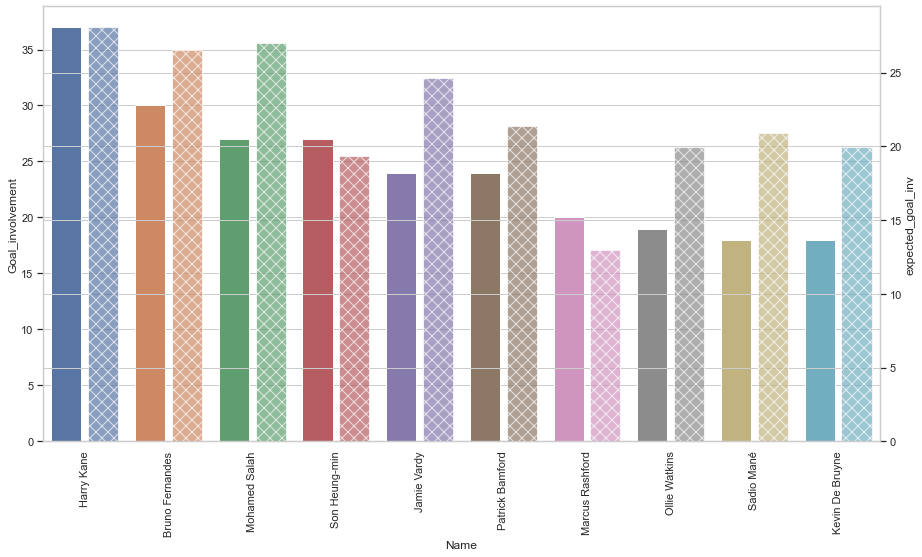

In [228]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Name', y='Goal_involvement', data=Name)
width_scale = 0.45
plt.xticks(rotation=90)
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)

ax2 = ax.twinx()
sns.barplot(x='Name', y='expected_goal_inv', data=Name, alpha=0.7, hatch='xx', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)

plt.show()

* ***Harry Kane, Son Heung-Min and Marcus Rashford are the only players who had more Goal Involvement than expected among the top attacking players. These three players had good efficiency in front of the Goal.***

**What's the percentage of Assisted and Non-Assisted goals through the season?**

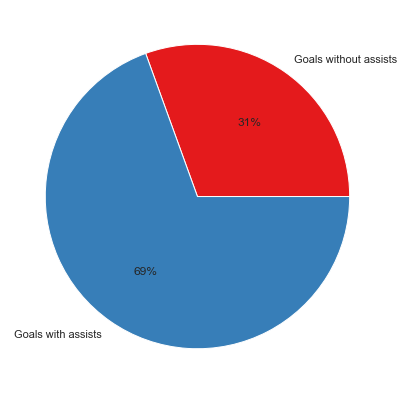

In [233]:
plt.figure(figsize= (14,7))

assists = EPL_dataset["Assists"].sum()

data = [Total_Goals - assists, assists]

labels = ["Goals without assists", "Goals with assists"]

color = sns.color_palette("Set1")

plt.pie(data, labels = labels, colors= color, autopct= "%.0f%%")

plt.show()

**Who are the top 6 players with the most Penalty goals?**

In [235]:
EPL_dataset.sort_values(by = "Penalty_Goals", ascending= False)[:6]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,74.6,9,10,0.45,0.32,6,0
110,Jamie Vardy,Leicester City,ENG,FW,33,34,31,2840,15,9,452,66.4,8,9,0.62,0.16,1,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,83.2,6,6,0.61,0.18,0,0
275,Anwar El Ghazi,Aston Villa,NED,FW,25,28,17,1613,10,0,613,70.5,4,4,0.45,0.13,2,0
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.60,0.22,1,0


In [244]:
Penalty_Top = EPL_dataset[["Name", "Club", "Penalty_Goals"]].sort_values(by = "Penalty_Goals", ascending= False)[:6]

Penalty_Top

,Name,Club,Penalty_Goals
51,Bruno Fernandes,Manchester United,9
110,Jamie Vardy,Leicester City,8
7,Jorginho,Chelsea,7
81,Mohamed Salah,Liverpool FC,6
275,Anwar El Ghazi,Aston Villa,4
162,Harry Kane,Tottenham Hotspur,4


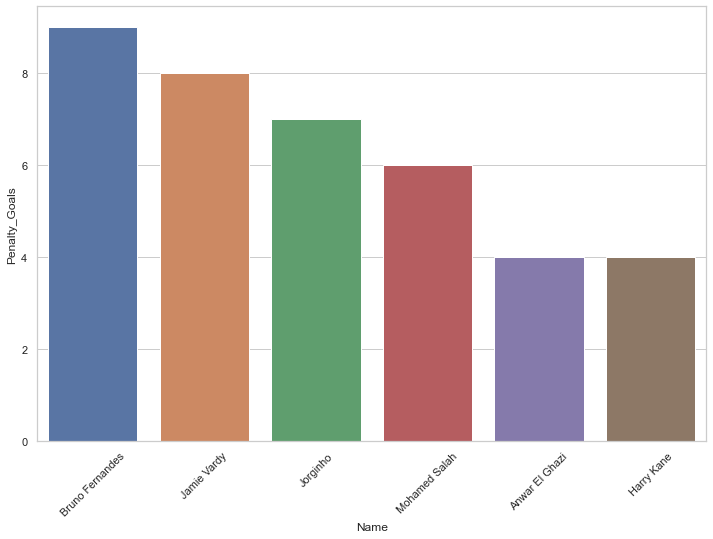

In [246]:
fig = plt.figure(figsize=(12,8))
ax =sns.barplot(x='Name', y='Penalty_Goals', data=Penalty_Top)
plt.xticks(rotation=45)

plt.show()

* *Bruno Fernandes of Manchester United Scored the most Penalty Goals (9), followed by Jamie Vardy of Leicester City (8).*

**Who are the players with the most passes? and Plot**

In [247]:
MostPassAttempt = EPL_dataset[['Name','Club','Passes_Attempted','Position']].nlargest(10,'Passes_Attempted')
MostPassAttempt

,Name,Club,Passes_Attempted,Position
80,Andrew Robertson,Liverpool FC,3214,DF
82,Trent Alexander-Arnold,Liverpool FC,2941,DF
29,Rodri,Manchester City,2728,MF
159,Pierre Højbjerg,Tottenham Hotspur,2687,MF
28,Rúben Dias,Manchester City,2671,DF
213,Luke Ayling,Leeds United,2661,DF
366,James Ward-Prowse,Southampton,2619,MF
109,Youri Tielemans,Leicester City,2559,MF
51,Bruno Fernandes,Manchester United,2283,MF
212,Stuart Dallas,Leeds United,2212,"DF,MF"


In [254]:
#same result as above but different method: 

MPA = EPL_dataset[["Name", "Club", "Passes_Attempted", "Position"]].sort_values(by = "Passes_Attempted", ascending= False)[:10]

MPA

,Name,Club,Passes_Attempted,Position
80,Andrew Robertson,Liverpool FC,3214,DF
82,Trent Alexander-Arnold,Liverpool FC,2941,DF
29,Rodri,Manchester City,2728,MF
159,Pierre Højbjerg,Tottenham Hotspur,2687,MF
28,Rúben Dias,Manchester City,2671,DF
213,Luke Ayling,Leeds United,2661,DF
366,James Ward-Prowse,Southampton,2619,MF
109,Youri Tielemans,Leicester City,2559,MF
51,Bruno Fernandes,Manchester United,2283,MF
212,Stuart Dallas,Leeds United,2212,"DF,MF"


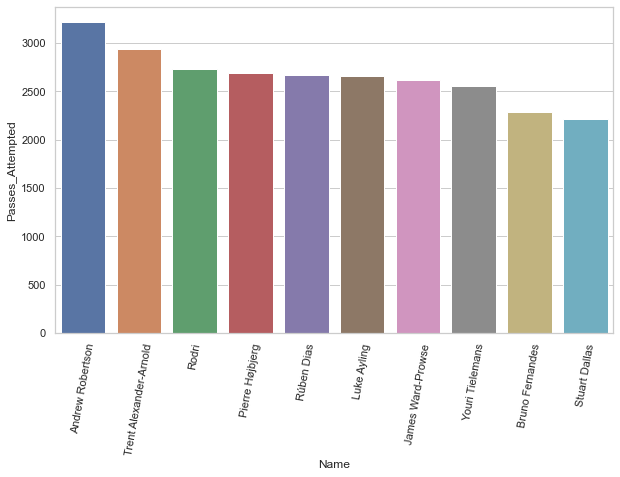

In [269]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Name', y='Passes_Attempted', data=MPA)
plt.xticks(rotation=80)


plt.show()

* Andrew Robertson followed by Trent Alexander-Arnold, both Liverpool FC players attempted most Passes in the league.

**Who are the most Efficient Passers?**

In [270]:
PassAccuracy = EPL_dataset[(EPL_dataset['Position'] != 'GK') & (EPL_dataset['Position'] != 'DF') & (EPL_dataset['Passes_Attempted']>= 1000)]
PassAccuracy[['Name', 'Club', 'Passes_Attempted', 'Perc_Passes_Completed']].nlargest(10, 'Perc_Passes_Completed')

,Name,Club,Passes_Attempted,Perc_Passes_Completed
195,Mohamed Elneny,Arsenal,1003,93.4
83,Georginio Wijnaldum,Liverpool FC,1747,93.3
29,Rodri,Manchester City,2728,91.5
87,Fabinho,Liverpool FC,2049,91.1
10,Mateo Kovačić,Chelsea,1737,91.0
33,İlkay Gündoğan,Manchester City,1707,91.0
185,Granit Xhaka,Arsenal,2164,89.9
32,Bernardo Silva,Manchester City,1427,89.7
7,Jorginho,Chelsea,1739,89.5
88,Thiago Alcántara,Liverpool FC,1674,89.5


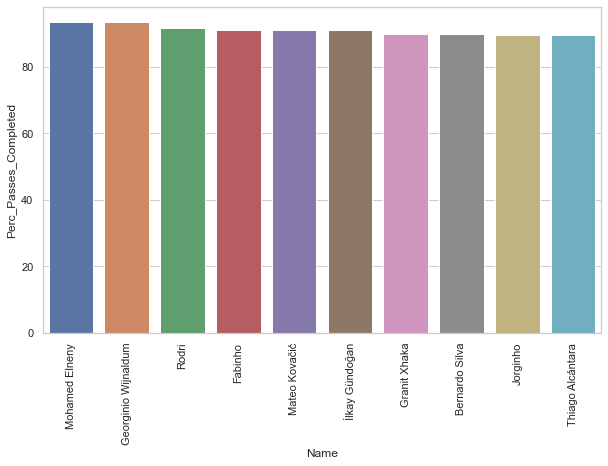

In [277]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Name', y='Perc_Passes_Completed', data=PassAccuracy.nlargest(10, 'Perc_Passes_Completed'))
plt.xticks(rotation=90)

plt.show()

* Mohamed Elneny of Arsenal FC followed by Georginio Wjinaldum of Liverpool FC were the most efficient passers with at least 1000 passes in the League.

**Players with the most number of fouls and given yellow/red card**

In [279]:
EPL_dataset['Total_Cards'] = EPL_dataset['Yellow_Cards']+EPL_dataset['Red_Cards']
EPL_dataset[['Name', 'Club', 'Yellow_Cards', 'Red_Cards', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Name,Club,Yellow_Cards,Red_Cards,Total_Cards
266,John McGinn,Aston Villa,12,0,12
53,Harry Maguire,Manchester United,11,0,11
270,Douglas Luiz,Aston Villa,10,1,11
480,Conor Gallagher,West Bromwich Albion,11,0,11
218,Kalvin Phillips,Leeds United,10,0,10
159,Pierre Højbjerg,Tottenham Hotspur,9,0,9
242,Mason Holgate,Everton,9,0,9
272,Matty Cash,Aston Villa,8,1,9
346,Luka Milivojević,Crystal Palace,8,1,9
396,Yves Bissouma,Brighton,8,1,9


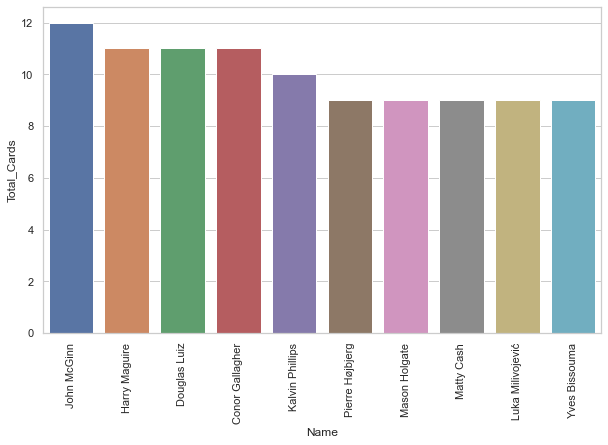

In [281]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Name', y='Total_Cards', data=EPL_dataset.nlargest(10, 'Total_Cards'))
plt.xticks(rotation=90)

plt.show()

* John Mcginn of Aston Villa followed by Harry Maguire of Man United got the most number of Cards for foul play.

**Determine team with most foul cards(Yellow/Red) received and plot.** 

In [282]:
TeamsMostCards=EPL_dataset.groupby(by='Club', as_index=False)['Total_Cards'].sum().sort_values(by='Total_Cards',ascending=False)
TeamsMostCards

,Club,Total_Cards
14,Sheffield United,76
1,Aston Villa,75
7,Fulham,70
13,Newcastle United,68
12,Manchester United,65
8,Leeds United,62
6,Everton,61
9,Leicester City,61
16,Tottenham Hotspur,59
5,Crystal Palace,58


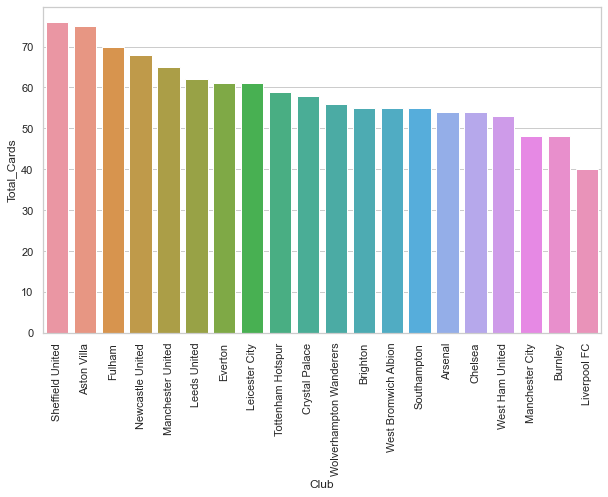

In [284]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Club', y='Total_Cards', data=TeamsMostCards)
plt.xticks(rotation=90)

plt.show()

* Sheffield United was the most aggressive team in the league with most cards overall and Liverpool FC was the least aggressive as they received the least number of cards in total.

**<h2><center>Conclusion</center></h2>**

* Crystal Palace and West Ham United has one of the eldest players percentile and Tottenham Hotspur has the youngest player in their squad

* West Brom has largest squad with 30 players in it. Leeds United has the smallest squad with 23 players under them.

* Team with the most number of Goals : Manchester City
* Player with the most number of Goals: Harry Kane
* Harry Kane, Son Heung-min and Marcus Rashford are the most efficient players in terms of Goal Involvement.
* Jesse Lingard is the most efficient player in terms of minutes per Goal Involvement.
* Player with the most penalty goal scored : Bruno Fernandes(9).
* Defender with the most goal : Lewis Dunk and Kurt Zuma (5).
* Player with the most pass attempt : Andrew Robertson.
* The most Efficient Passer with at least 1000 passes : Mohamed Elneny.
* Player with the most number of foul cards received: John Mcginn.
* Team with the most foul cards received : Sheffield United.